In [3]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import librosa

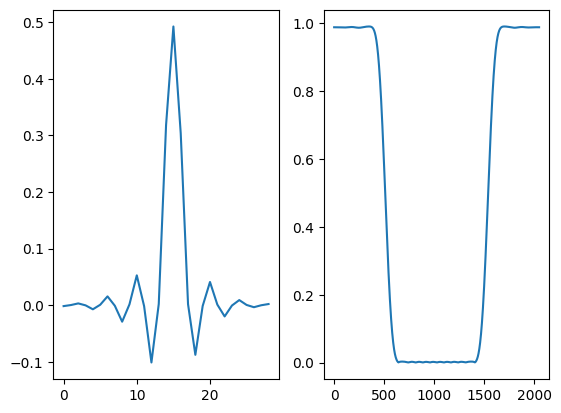

In [4]:
def getFIRFFT(H, order):
    NFFT = (len(H)-1)*2
    H = np.concatenate((H, H[-2:0:-1])) + np.zeros(NFFT)*(1j)
    h = np.fft.ifft(H, NFFT//2)
    order = min(order, NFFT-1)
    h = np.concatenate((h[len(h)-order//2:], h[0:order//2-1]))
    win = librosa.filters.get_window('hamming', len(h), fftbins=False)
    h = h*win
    return h.real

y = getFIRFFT(H=np.array([1.0]*64+[0.0]*128+[1.0]*64),order=30)
plt.subplot(1,2,1)
plt.plot(y)
NFFT = 2048
y_fft = np.abs(np.fft.fft(y, NFFT))
plt.subplot(1,2,2)
plt.plot(y_fft)
plt.show()
